Proyek Akhir MBKM Orbit

Anggota Kelompok:

1. Halomoan Filipus Simarmata (Jupyter XXI)
2. Nyayu Chika Marselina (Jupyter XXI)
3. Athiya Shinta Wulandari (Cordoba)
4. Sukma Imelda (Cordoba)
5. Wella Novita Andriani (Cordoba)

**Problem Scooping**
1. Who : masyarakat dan khususnya wisatawan asing

2. What : Ketertinggalan kue tradisional Indonesia dibandingkan kue-kue modern saat ini apalagi kue-kue modern memiliki proses pembuatan yang lebih efisien dan mudah didapatkan daripada kue tradisional sehingga memiliki kemungkinan bahwa kedepannya kue tradisional Indonesia tidak banyak diketahui oleh masyarakat.

3. Where: pada saat masyarakat yang berada di dalam maupun di luar Indonesia membutuhkan informasi mengenai kue tradisional indonesia

4. Why : nilai utama dari permasalahan ini adalah membantu menyalurkan informasi mengenai kue tradisional Indonesia

**Data Acquisition:**
Data diperoleh dari Kaggle (https://www.kaggle.com/datasets/ilhamfp31/kue-indonesia) berjumlah 1845 data dimana terdapat data testing sebanyak 162 data, data training sebanyak 1523 data, data validation sebanyak 160 data.

**Data Exploration:**
Data berupa kumpulan foto kue tradisional Indonesia dari 8 kelas yang terdiri dari kue klepon, kue lumpur, kue kastengel, kue putri salju, kue serabi, kue lapis, kue risoles, dan kue dadar gulung dengan jumlah pada setiap kelas adalah 240 data, 238 data, 223 data, 214 data, 221 data, 241 data, 236 data, dan 232 data.

#Connect Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nyayuchikamarselina","key":"654fc02f4308f0caeb258e921d77b671"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/kaggle.json


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            391        407  0.9375           
datasets/muhmores/spotify-top-100-songs-of-20152019                            Spotify Top 100 Songs of 2010-2019               139KB  2022-04-09 06:35:36           2075         47  0.8235294        
datasets/piterfm/2022-ukraine-russian-war                                      2022 Ukraine Russia War                            2KB  2022-04-26 09:46:37          11846        650  1.0              


In [ ]:
!kaggle datasets download -d ilhamfp31/kue-indonesia

 99% 299M/303M [00:02<00:00, 148MB/s]
100% 303M/303M [00:02<00:00, 121MB/s]


In [ ]:
!unzip kue-indonesia.zip -d drive/MyDrive

Archive:  kue-indonesia.zip
  inflating: drive/MyDrive/test/kue_dadar_gulung/0.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/1.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/10.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/11.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/12.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/13.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/14.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/15.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/16.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/17.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/18.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/19.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/2.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/3.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/4.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/5.jpg  
  inflating: drive/MyDrive/test/kue_dadar_gulung/6

#Set Up Vision Transformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
path = "/content/drive/MyDrive/kue-indonesia-augmentasi"

In [ ]:
import glob
filename = glob.glob(path+"/*/*.jpg")

In [ ]:
filename

['/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_0.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_1.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_2.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_3.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_4.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_5.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_6.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_7.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_8.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_9.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue_dadar_gulung/augmentasi_10.jpg',
 '/content/drive/MyDrive/kue-indonesia-augmentasi/kue

In [ ]:
import os 
import cv2 as cv
def read_data(filename):
  labels=[]
  gambar=[]
  for i in filename:
    label=os.path.dirname(i)
    labels.append(os.path.basename(label))
    img=cv.imread(i)
    img=cv.resize(img,(256,256))
    gambar.append(img)
  gambar=np.asarray(gambar)
  return (gambar,labels)


In [ ]:
gambar, labels=read_data(filename)

In [ ]:
gambar.shape[0] == len(labels)

True

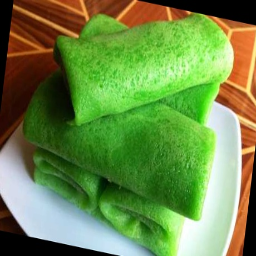

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(gambar[1])

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit (labels)
yi=lb.transform(labels)

In [ ]:
yi.shape

(5277,)

In [ ]:
yis=np.expand_dims(yi, -1)

In [ ]:
yis.shape

(5277, 1)

#Arsitektur A

In [ ]:
num_classes = 8 #jumlah kelas dalam folders kue tradisional
input_shape= (256,256,3)
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 50
image_size = 72
patch_size = 6
num_patches = (image_size//patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
                     projection_dim * 2,
                     projection_dim, 
]
transformer_layers = 8
mlp_head_units = [2048, 1024]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(gambar,yis,
                                                 test_size=0.2,
                                                 random_state = 10)

##Augmentasi

In [ ]:
data_augmentation = keras.Sequential(
    [
      layers.Normalization(),
      layers.Resizing(image_size, image_size),
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(factor=0.02),
      layers.RandomZoom(
          height_factor=0.2, width_factor=0.2
      ),
     
    ],
    name="data_augmentation"
)
data_augmentation.layers[0].adapt(X_train)

##MLP

In [ ]:
def mlp(x, hidden_units, dropout_rate):
  for units in hidden_units:
    x=layers.Dense(units,activation=tf.nn.gelu)(x)
    x=layers.Dropout(dropout_rate)(x)
  return x

##Implement Patch Creation as a Layer

In [ ]:
class Patches(layers.Layer):
  def __init__(self, patch_size):
    super(Patches, self).__init__()
    self.patch_size = patch_size

  def call(self, images):
    batch_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=[1, self.patch_size, self.patch_size, 1],
        strides=[1, self.patch_size, self.patch_size, 1],
        rates=[1, 1, 1, 1],
        padding = "VALID"
    )
    patch_dims=patches.shape[-1]
    patches = tf.reshape(patches, [batch_size, -1, patch_dims])
    return patches

image size: 72 X 72
Patch Size: 6 X 6
Patch per image: 144
Element per patch: 108


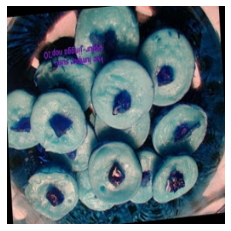

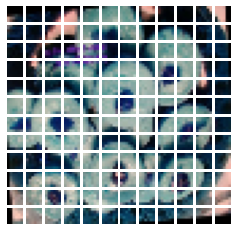

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
image = X_train[2]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]),size=(image_size, image_size)
)

patches = Patches(patch_size)(resized_image)
print(f"image size: {image_size} X {image_size}")
print(f"Patch Size: {patch_size} X {patch_size}")
print(f"Patch per image: {patches.shape[1]}")
print(f"Element per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4,4))
for i, patch in enumerate(patches[0]):
  ax = plt.subplot(n, n, i+1)
  patch_img = tf.reshape(patch, (patch_size,patch_size,3))
  plt.imshow(patch_img.numpy().astype("uint8"))
  plt.axis("off")

##Patch Encoding

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

##Model

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
from keras.models import model_from_json
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/content/drive/MyDrive/kue-indonesia-augmentasi/ViTarsitekturA.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.2,
        callbacks=[checkpoint_callback],
    )


    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

In [ ]:
vit_classifier = create_vit_classifier()

In [ ]:
history = run_experiment(vit_classifier)

Epoch 1/50
106/106 [==============================] - 30s 91ms/step - loss: 3.0945 - accuracy: 0.2654 - top-5-accuracy: 0.8164 - val_loss: 1.6093 - val_accuracy: 0.3763 - val_top-5-accuracy: 0.9136
Epoch 2/50
106/106 [==============================] - 8s 79ms/step - loss: 1.7665 - accuracy: 0.3451 - top-5-accuracy: 0.8996 - val_loss: 1.5139 - val_accuracy: 0.4272 - val_top-5-accuracy: 0.9361
Epoch 3/50
106/106 [==============================] - 9s 85ms/step - loss: 1.5907 - accuracy: 0.3880 - top-5-accuracy: 0.9334 - val_loss: 1.4264 - val_accuracy: 0.4544 - val_top-5-accuracy: 0.9373
Epoch 4/50
106/106 [==============================] - 9s 85ms/step - loss: 1.5190 - accuracy: 0.4215 - top-5-accuracy: 0.9425 - val_loss: 1.4097 - val_accuracy: 0.4805 - val_top-5-accuracy: 0.9432
Epoch 5/50
106/106 [==============================] - 9s 85ms/step - loss: 1.4273 - accuracy: 0.4727 - top-5-accuracy: 0.9491 - val_loss: 1.3455 - val_accuracy: 0.4994 - val_top-5-accuracy: 0.9456
Epoch 6/50
106

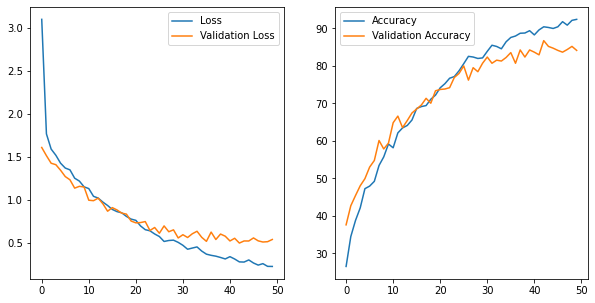

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(history.history['loss'], '-', label = 'Loss')
ax1.plot(history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(history.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(history.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

In [ ]:
y_pred=vit_classifier.predict(X_test)

In [ ]:
y_pred=np.argmax(y_pred,axis=-1)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=lb.classes_))

                  precision    recall  f1-score   support

kue_dadar_gulung       0.92      0.84      0.88       133
   kue_kastengel       0.93      0.79      0.85       141
      kue_klepon       0.96      0.89      0.92       127
       kue_lapis       0.88      0.79      0.83       125
      kue_lumpur       0.80      0.89      0.84       132
 kue_putri_salju       0.91      0.95      0.93       121
     kue_risoles       0.79      0.92      0.85       143
      kue_serabi       0.82      0.87      0.84       134

        accuracy                           0.87      1056
       macro avg       0.87      0.87      0.87      1056
    weighted avg       0.87      0.87      0.87      1056



In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[112,   0,   0,   4,   7,   1,   1,   8],
       [  0, 111,   0,   1,   7,   2,  17,   3],
       [  1,   0, 113,   5,   0,   3,   0,   5],
       [  2,   2,   2,  99,   6,   0,  11,   3],
       [  4,   0,   0,   2, 118,   1,   5,   2],
       [  0,   1,   3,   0,   0, 115,   0,   2],
       [  0,   6,   0,   0,   3,   0, 132,   2],
       [  3,   0,   0,   2,   7,   4,   2, 116]])

#Arsitektur B

In [ ]:
#Rombak Arsitektur (Rombak sendiri menyesuaikan saran coach angel)
num_classes = 8 #jumlah kelas dalam folders kue tradisional
input_shape= (256,256,3)
learning_rate = 0.0001
weight_decay = 0.00001
batch_size = 64
num_epochs = 50
image_size = 144
patch_size = 12
num_patches = (image_size//patch_size) ** 2
projection_dim = 128
num_heads = 8
transformer_units = [
                     projection_dim * 2,
                     projection_dim, 
]
transformer_layers = 8
mlp_head_units = [2048, 1024]

In [ ]:
#Catatan:
#Ketika input shape = 512 x 512 tjd error alhasil diubah jadi 256 x 256. rombak arsitektur awal menghasilkan akurasi sebesar 14%
#rombak arsitektur dgn mengganti projection_dim mjd 64 dan num_heads = 4, hasil = 19%
#balik ke rombak arsitektur awal tapi input shape diganti mjd 256 x 256, lr diganti 0,0001 dan weight decay 0,00001

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(gambar,yis,
                                                 test_size=0.2,
                                                 random_state = 10)

##Augmentasi

In [ ]:
data_augmentation = keras.Sequential(
    [
      layers.Normalization(),
      layers.Resizing(image_size, image_size),
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(factor=0.02),
      layers.RandomZoom(
          height_factor=0.2, width_factor=0.2
      ),
     
    ],
    name="data_augmentation"
)
data_augmentation.layers[0].adapt(X_train)

##MLP

In [ ]:
def mlp(x, hidden_units, dropout_rate):
  for units in hidden_units:
    x=layers.Dense(units,activation=tf.nn.gelu)(x)
    x=layers.Dropout(dropout_rate)(x)
  return x

##Implement Patch Creation as a Layer

In [ ]:
class Patches(layers.Layer):
  def __init__(self, patch_size):
    super(Patches, self).__init__()
    self.patch_size = patch_size

  def call(self, images):
    batch_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=[1, self.patch_size, self.patch_size, 1],
        strides=[1, self.patch_size, self.patch_size, 1],
        rates=[1, 1, 1, 1],
        padding = "VALID"
    )
    patch_dims=patches.shape[-1]
    patches = tf.reshape(patches, [batch_size, -1, patch_dims])
    return patches

image size: 144 X 144
Patch Size: 12 X 12
Patch per image: 144
Element per patch: 432


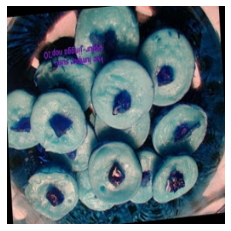

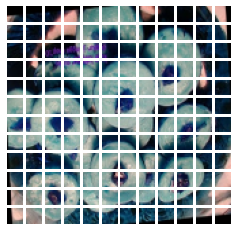

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
image = X_train[2]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]),size=(image_size, image_size)
)

patches = Patches(patch_size)(resized_image)
print(f"image size: {image_size} X {image_size}")
print(f"Patch Size: {patch_size} X {patch_size}")
print(f"Patch per image: {patches.shape[1]}")
print(f"Element per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4,4))
for i, patch in enumerate(patches[0]):
  ax = plt.subplot(n, n, i+1)
  patch_img = tf.reshape(patch, (patch_size,patch_size,3))
  plt.imshow(patch_img.numpy().astype("uint8"))
  plt.axis("off")

##Patch Encoding

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

##Model

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
from keras.models import model_from_json
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/content/drive/MyDrive/kue-indonesia-augmentasi/ViTarsitekturB.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.2,
        callbacks=[checkpoint_callback],
    )


    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

In [ ]:
vit_classifier = create_vit_classifier()

In [ ]:
history2 = run_experiment(vit_classifier)

Epoch 1/50
53/53 [==============================] - 31s 401ms/step - loss: 3.0105 - accuracy: 0.2456 - top-5-accuracy: 0.8084 - val_loss: 1.6465 - val_accuracy: 0.3562 - val_top-5-accuracy: 0.9077
Epoch 2/50
53/53 [==============================] - 20s 369ms/step - loss: 2.1690 - accuracy: 0.2962 - top-5-accuracy: 0.8614 - val_loss: 1.5443 - val_accuracy: 0.4296 - val_top-5-accuracy: 0.9254
Epoch 3/50
53/53 [==============================] - 20s 369ms/step - loss: 1.8841 - accuracy: 0.3412 - top-5-accuracy: 0.8937 - val_loss: 1.4874 - val_accuracy: 0.4497 - val_top-5-accuracy: 0.9349
Epoch 4/50
53/53 [==============================] - 21s 394ms/step - loss: 1.7356 - accuracy: 0.3572 - top-5-accuracy: 0.9040 - val_loss: 1.4532 - val_accuracy: 0.4521 - val_top-5-accuracy: 0.9385
Epoch 5/50
53/53 [==============================] - 20s 377ms/step - loss: 1.6730 - accuracy: 0.3803 - top-5-accuracy: 0.9171 - val_loss: 1.4242 - val_accuracy: 0.4970 - val_top-5-accuracy: 0.9349
Epoch 6/50
53/5

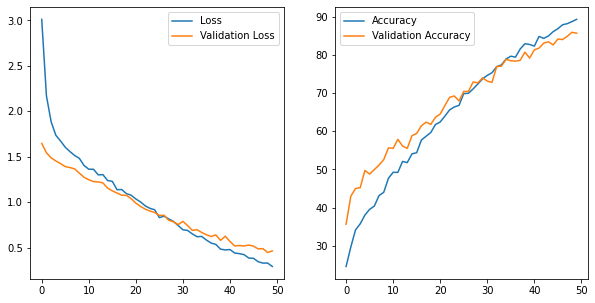

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(history2.history['loss'], '-', label = 'Loss')
ax1.plot(history2.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(history2.history['accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(history2.history['val_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

In [ ]:
y_pred=vit_classifier.predict(X_test)

In [ ]:
y_pred=np.argmax(y_pred,axis=-1)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=lb.classes_))

                  precision    recall  f1-score   support

kue_dadar_gulung       0.89      0.86      0.87       133
   kue_kastengel       0.85      0.86      0.86       141
      kue_klepon       0.91      0.91      0.91       127
       kue_lapis       0.92      0.74      0.82       125
      kue_lumpur       0.82      0.86      0.84       132
 kue_putri_salju       0.92      0.95      0.93       121
     kue_risoles       0.87      0.87      0.87       143
      kue_serabi       0.79      0.87      0.83       134

        accuracy                           0.87      1056
       macro avg       0.87      0.87      0.87      1056
    weighted avg       0.87      0.87      0.87      1056



In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[114,   2,   1,   2,   4,   1,   0,   9],
       [  1, 121,   0,   0,   8,   3,   6,   2],
       [  0,   1, 116,   3,   1,   4,   0,   2],
       [  5,   6,   5,  93,   6,   0,   7,   3],
       [  3,   4,   2,   1, 114,   0,   4,   4],
       [  0,   0,   1,   0,   0, 115,   0,   5],
       [  1,   7,   0,   0,   3,   0, 125,   7],
       [  4,   1,   3,   2,   3,   2,   2, 117]])